# Project: Investigating Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Dataset of movies from TMDB (The Movie Data Base) with information about movies released from 1960 to 2015, including columns of movie id, imdb id, cast, genre, production companies, budget, revenue, director, overview, runtime and other.

## Analysis Questions

> **Question 1**: *How does budget, revenue and vote average each affect the success of movies?* 

> **Question 2**: *Does a higher budget (greater investment) lead to higher ratings?*

> **Question 3**: *How does budget affect the audience reach through the vote counts?*

> **Question 4**: *How does budget and revenue relate to popularity and what is the relation between the 3 features?*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Upgrading pandas 
!pip install pandas==0.23.4

    100% |████████████████████████████████| 8.9MB 3.0MB/s eta 0:00:01
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

### Data Gathering

In [7]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [8]:
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

### Data Assessment

In [9]:
df.shape

(10866, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning 

#### Dropping columns of id, imdb_id, homepage, tagline, keywords, overview and production companies.
- The conducted analysis questions focus on the financial aspects as well as the performance and thus those columns do not represent impacting factors for these areas of the analysis.

In [11]:
df.drop(columns = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], inplace = True)

In [12]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

> As the null values are present in columns of non numeric data types (neither integer nor float) which are cast, director and genres, the best way to clean the data from those missing values is by dropping them only by the dropna method and not filling any.

In [13]:
columns_with_null = pd.Series(['cast', 'director', 'genres'])
for column in columns_with_null:
    print(f"{column} is {df[column].dtypes}")

cast is object
director is object
genres is object


In [14]:
df.dropna(inplace= True)
df.drop_duplicates(inplace = True)

> No data type conversions will take place as the intended columns to be analyzed of budget, revenue, vote_average, vote_count and popularity are in the required data type.

> The release_date column data type is not converted into date-time type in order to not affect the upcoming visualizations of numeric column data types.

In [15]:
columns_to_analyze = pd.Series(['budget', 'revenue', 'vote_average', 'vote_count', 'popularity'])
for column in columns_to_analyze:
    print(f"{column} is {df[column].dtype}")

budget is int64
revenue is int64
vote_average is float64
vote_count is int64
popularity is float64


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: How does budget, revenue and vote average each affect movies?

 *Histograms are chosen because they show the data distribution clearly and concisely*

In [35]:
# Creating a function that reduce code repetition of generating histograms for given column
def hist_generator(df,column):
    plt.hist(df[column], bins = 20);
    plt.xlabel(column.title())
    plt.ylabel('Frequency')
    plt.title(f"{column.title()} Distribution");

In [36]:
# To remove the scientific notation from the float data values
pd.options.display.float_format = '{:,.0f}'.format

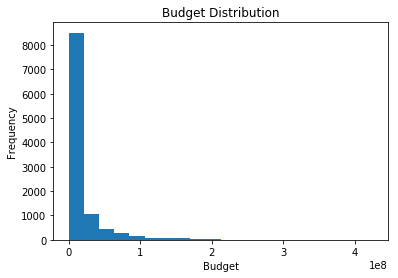

In [37]:
# Overview at the distribution of Budget
hist_generator(df,'budget')

In [33]:
df['budget'].describe()

count        10,731
mean     14,803,646
std      31,064,556
min               0
25%               0
50%               0
75%      16,000,000
max     425,000,000
Name: budget, dtype: float64

> Most movies are produced with low budgets where movies with high budgets are rare.

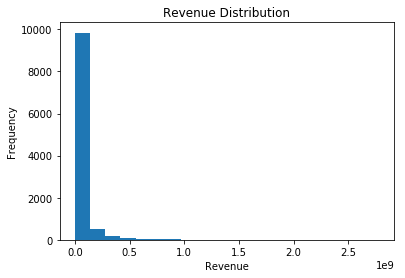

In [29]:
# Overview at the distribution of Revenue
hist_generator(df,'revenue')

In [38]:
df['revenue'].describe()

count          10,866
mean       39,823,320
std       117,003,487
min                 0
25%                 0
50%                 0
75%        24,000,000
max     2,781,505,847
Name: revenue, dtype: float64

> Most movies made low revenues and even some movies made 0 revenues suggesting that they might not have been released in cinemas.

> Presence of positive correlation between budget and revenue where low budget movies made low revenues.

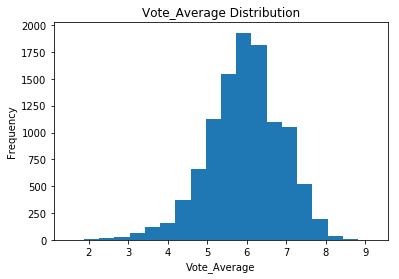

In [30]:
# Overview at the distribution of Rating
hist_generator(df,'vote_average')

> An approximate normal distribution showing that most movies receive average ratings from 5 to 7 while very small number of movies receive ratings greater than or equal to 8.

### Question 2: Does a higher budget (greater investment) lead to higher ratings?

In [38]:
# Function that converts data frame columns into NumPy Arrays in order to perfom operations on them
"""
Arguments:
    df: Data Frame where the column exists
    column: Takes the column name

Returns:
    A rank 1 numpy array from a data frame column

"""

def column_to_array(df,column):
    np_array = np.array(df[column]).flatten()
    return np_array

In [39]:
budget = column_to_array(df,'budget')
rating = column_to_array(df,'vote_average')
# Code (Masks) to get average ratings (vote_average) based on the average of high/low budget movies
budget_median = np.median(budget) # Median is applied because it is not affected by outliers
high_budget_ratings = rating[budget > budget_median]
low_budget_ratings = rating[budget <= budget_median]
average_high_budget = np.mean(high_budget_ratings)
average_low_budget = np.mean(low_budget_ratings)

print(f"High budget movies average rating: {average_high_budget:.1f}") # Round to first decimal value
print(f"Low budget movies average rating: {average_low_budget:.1f}")

High budget movies average rating: 6.0
Low budget movies average rating: 5.9


### Answer

While high budget movies tend to get higher ratings than low budget ones, but the difference is too small to be considered a factor and thus increasing the budget does not always guarantee high ratings.

### Question 3: How does budget affect the audience reach through the vote counts?

In [40]:
budget = column_to_array(df,'budget')
vote_counts = column_to_array(df, 'vote_count')
# Code (Masks) to get average number of votes (vote_counts) based on the average of high/low budget of movies
median_budget = np.median(budget)  # Median is applied because it is not affected by outliers
high_budget_numvotes = vote_counts[budget > median_budget]
low_budget_numvotes = vote_counts[budget <= median_budget]
average_high_budget_votes = np.mean(high_budget_numvotes)
average_low_budget_votes = np.mean(low_budget_numvotes)

print(f"High budget movies average vote counts: {average_high_budget_votes:.0f}") # Rounded to nearest integer as vote_counts is discrete quantitative data
print(f"Low budget movies average vote counts: {average_low_budget_votes:.0f}")

High budget movies average vote counts: 410
Low budget movies average vote counts: 44


## Answer (Observation)
High budget has great vote counts which means bigger reach for audience so budget is highly correlated with vote counts. 

### Question 4: How does budget and revenue relate to popularity and what is the relation between the 3 features?

*Scatter plot is choosen because it is the most suitable graph to show the relation between 3 features as well as showing the data trends and clusters*

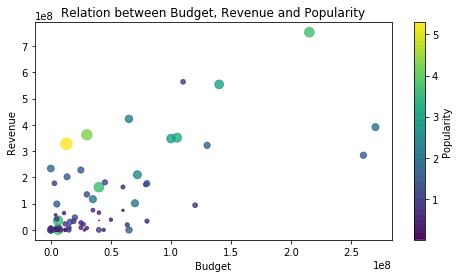

In [42]:
# Getting a 150 movies sample from the dataset in order to prevent dense clustering for a clear visualization
df_sample = df.sample(n = 150, random_state = 42)  # random_state is applied to ensure having the same sample each time running the code

plt.figure(figsize = (8,4))
plt.scatter(df_sample['budget'], df_sample['revenue'], s = df_sample['popularity']*25, c = df_sample['popularity'], alpha = 0.8)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Relation between Budget, Revenue and Popularity")
cbar = plt.colorbar()
cbar.set_label("Popularity")
plt.show()

## Answer (Observation)

 - The previously observed positive relation between budget and revenue is visible on the plot.
 - Some low budget movies make high revenues indicating that budget is not the only factor that controls revenue.
 - Most popular movies resembled in green and yellow dots cluster around movies of medium to high budgets and revenues.
 - Not all movies of high revenue are the most popular, so high revenues do not guarantee popularity.

<a id='conclusions'></a>
## Conclusions

> The conducted analysis showed that most movies are produced with low budgets and make low revenue while high budget movies are rare. It was observed that there is a positive correlation between budget and revenue but it became clear that budget as a single factor is not associated with high revenue as there were some low budget movies that made high revenues.

> On conducting analysis to find the relation between movie budget and ratings, it turned out that high budget movies tend to receive slightly better ratings but the effect is extremely small to be considered an associated factor and thus increasing the budget does not always guarantee high ratings. Instead it was clearly observed that budget is strongly correlated with audience reach.

> Upon exploring the triad relation between budget, revenue and popularity. The positive correlation between revenue and budget was obvious and turned out that not all movies of high revenue are the most popular therefore high revenues are not associated with popularity. In addition to the observation that most popular movies were of moderate to high budgets and revenues.


## Additional Research

 - Additional analysis regarding audience can be conducted in terms of gathering and exploring audience cultural backgrounds and their engagement with specific movie genres and its effect on revenue.

 - More analysis regarding director with cast and their influence on movie budget, revenue and popularity can be further explored.

 - Research in how releasing movies in seasons and special occations affect their revenue and audience reach.

## Limitations
 - Budget and revenue are analyzed without applying inflation rates which might misrepresent analysis for long-term durations.
 - The sample taken from the dataset to find the relation between budget, revenue and popularity might not be accurately representative for the whole dataset.
 - The difficulty in analyzing categorical data without additional preprocessing such as in cast and genres columns due to the presence of multiple values in one row.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0